In [1]:

from keras.layers import Input, Lambda, Dense, Flatten, BatchNormalization
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [2]:

train_dir = 'waste/train'
test_dir = 'waste/test'

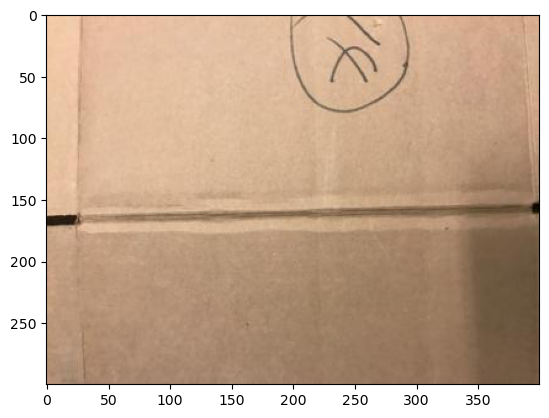

In [3]:
# Load image from file
img1 = mpimg.imread('waste/train/cardboard/cardboard1.jpg')

# Plot the image
plt.imshow(img1)
plt.show()

In [4]:
# Get the shape of the image
height, width, channels = img1.shape

In [5]:
print("Image shape: {} x {} x {}".format(height, width, channels))

Image shape: 300 x 400 x 3


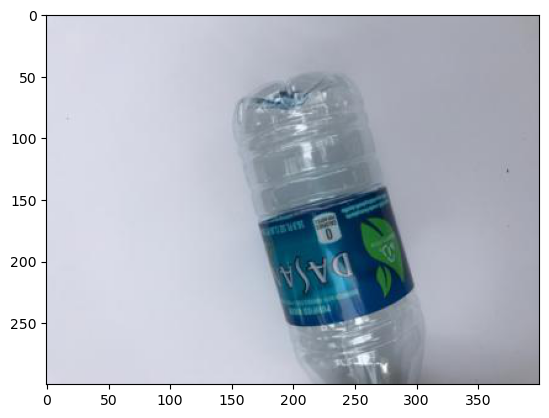

In [6]:
img2 = mpimg.imread('waste/train/plastic/plastic100.jpg')

# Plot the image
plt.imshow(img2)
plt.show()

In [7]:
# Get the shape of the image
height, width, channels = img2.shape

print("Image shape: {} x {} x {}".format(height, width, channels))

Image shape: 300 x 400 x 3


In [8]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [9]:

train_path = 'waste/train'
valid_path = 'waste/test'

In [10]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [11]:
# Freeze all layers in the VGG16 model

for layer in vgg.layers:
  layer.trainable = False

In [12]:

  # useful for getting number of classes
folders = glob('waste/train/*')
  


In [13]:
folders

['waste/train\\cardboard',
 'waste/train\\compost',
 'waste/train\\glass',
 'waste/train\\metal',
 'waste/train\\paper',
 'waste/train\\plastic',
 'waste/train\\trash']

In [14]:

# vgg is a pre-trained VGG16 model, and x is the output of the last convolutional layer in the VGG16 model. 
# The Flatten() layer is used to flatten the output of the convolutional layer to a 1D vector, 
#  which can then be fed into a fully connected Dense layer.

x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)


In [15]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)


In [16]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [19]:

training_set = train_datagen.flow_from_directory('waste/train',
                                                 target_size = (224, 224),
                                                 batch_size = 50,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('waste/test',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')

Found 2187 images belonging to 7 classes.
Found 564 images belonging to 7 classes.


In [20]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Ashok\AppData\Local\Temp\ipykernel_28708\1340501188.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
44/44 [==============================] - 502s 11s/step - loss: 1.3680 - accuracy: 0.5171 - val_loss: 0.9498 - val_accuracy: 0.6454
Epoch 2/5
44/44 [==============================] - 493s 11s/step - loss: 0.7803 - accuracy: 0.7275 - val_loss: 1.0264 - val_accuracy: 0.6383
Epoch 3/5
44/44 [==============================] - 577s 13s/step - loss: 0.6432 - accuracy: 0.7796 - val_loss: 0.8606 - val_accuracy: 0.6826
Epoch 4/5
44/44 [==============================] - 666s 15s/step - loss: 0.4847 - accuracy: 0.8445 - val_loss: 0.9064 - val_accuracy: 0.6826
Epoch 5/5
44/44 [==============================] - 549s 13s/step - loss: 0.4462 - accuracy: 0.8541 - val_loss: 0.8571 - val_accuracy: 0.7004


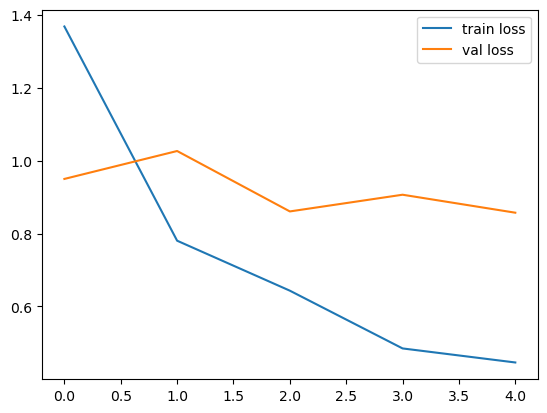

<Figure size 640x480 with 0 Axes>

In [23]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

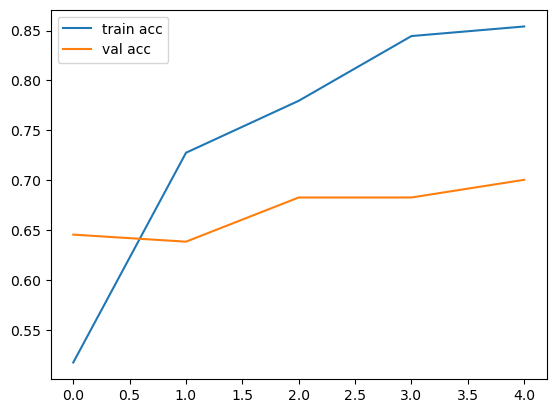

In [27]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [28]:
y_pred = model.predict(test_set)

12/12 [==============================] - 111s 9s/step


In [29]:
y_pred

array([[4.28730585e-02, 2.14648987e-09, 1.17305259e-04, ...,
        9.56888258e-01, 6.67313288e-05, 7.21311650e-08],
       [1.04892461e-05, 3.48144408e-06, 8.35828006e-01, ...,
        4.37807234e-04, 6.78140670e-02, 1.62828583e-02],
       [9.97646153e-01, 1.08206194e-10, 2.07855305e-06, ...,
        2.03745044e-03, 2.76619307e-04, 2.30463293e-08],
       ...,
       [1.09009980e-03, 7.09330343e-05, 2.10878556e-04, ...,
        2.38039419e-02, 3.05161327e-01, 6.58325970e-01],
       [1.60243129e-03, 7.28485475e-06, 4.71713245e-01, ...,
        1.55614968e-02, 6.26929849e-02, 4.53182525e-04],
       [3.53577249e-02, 2.32483717e-06, 5.35280924e-05, ...,
        9.31443393e-01, 6.27438203e-05, 3.30075063e-02]], dtype=float32)

In [31]:
from tensorflow.keras.preprocessing import image

output_class = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']


def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

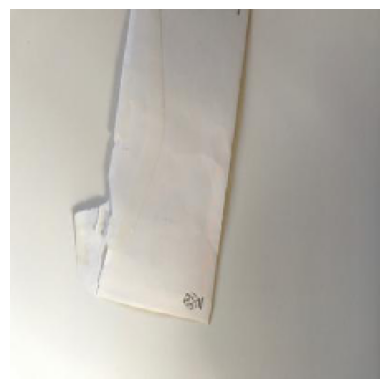

1/1 [==============================] - 0s 325ms/step
Your waste material is  paper  with  92.2  % accuracy


In [32]:
waste_prediction("waste/test/paper/paper132.jpg")

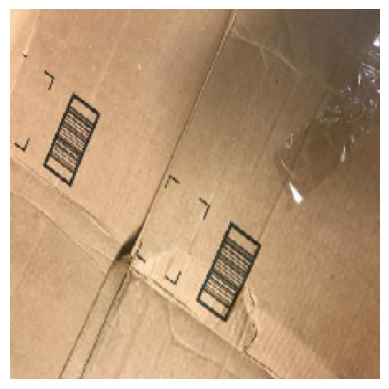

1/1 [==============================] - 0s 192ms/step
Your waste material is  paper  with  82.02  % accuracy


In [33]:
waste_prediction("waste/test/cardboard/cardboard12.jpg")

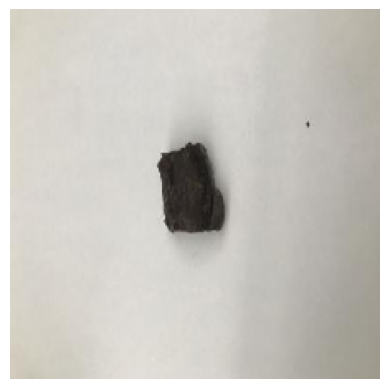

1/1 [==============================] - 0s 193ms/step
Your waste material is  compost  with  86.82  % accuracy


In [34]:
waste_prediction("waste/test/compost/compost138.jpg")

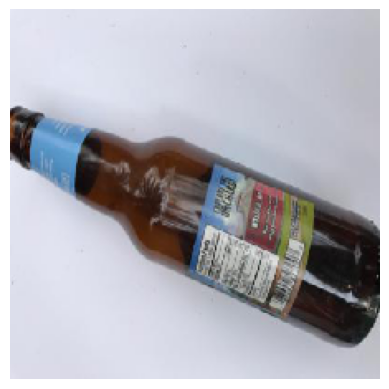

1/1 [==============================] - 0s 184ms/step
Your waste material is  glass  with  97.37  % accuracy


In [35]:
waste_prediction("waste/test/glass/glass151.jpg")

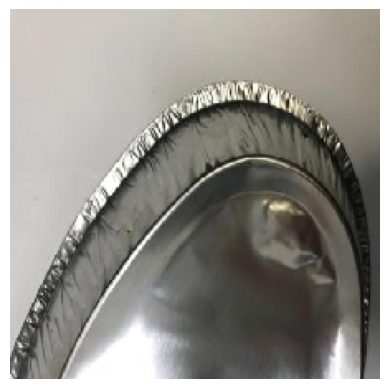

1/1 [==============================] - 0s 216ms/step
Your waste material is  metal  with  99.99  % accuracy


In [36]:
waste_prediction("waste/test/metal/metal144.jpg")

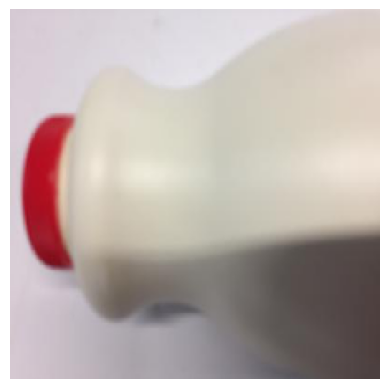

1/1 [==============================] - 0s 252ms/step
Your waste material is  glass  with  51.96  % accuracy


In [37]:
waste_prediction("waste/test/plastic/plastic118.jpg")